# Leaders:
* Initially: Henk Bodrogi and Carmine Osvaldo
* Later: Elian Karel until murdered on 19 June 2009 
* Now: Silvia Marek 

# Extended netowork
* Family of Juliana Vann: Mandor Vann, Isia Vann
* Lorenzo Di Stefano – professor of environmental science at the University of Abila
* The army of people of Asterian (APA): organization associated with drugs trafficking.
* GASTech employers connected to POK members.  


# Stucture of POK
* Citizens of Elodis began to be concerned about an abnormal increase in the occurrence of illnesses
* POK formed in 1998 by 7 founding members: Henk Bodrogi, Carmine Osvaldo, Ale L. Hanne, Jeroen Karel, Valentine Mies, Yanick Cato, Joreto Katell
* Henk Bodrogi becomes POK leader
* Elian Karel becomes POK leader in 2001
* Elian Karel is arrested and murderd on 19 June 2009 
* Silvia Marek becomes POK leader

* Before 2009 POK was associated with health and positive activism. POK's "extended network" included activists and family of Juliana Vann.
* After 2009 organization became asociated with terms such as arrest violence. POK's "extended network" now includes APA, organization asociated with drugs trafficking. 

# Connections between POK and GASTech
* Isia Vann, Ruscella Mies Haber, Inga Ferro, Loreto Bodrogi, Minke Mies, Hennie Osvaldo.
* All except Haber work in security, Bodrogi and Ferro were recently hired. 
* Another possible connection is Edvard Vann, also from Vann Family, also works in security and was also recently hired.

In [1]:
import io
import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('punkt')
from nltk import tokenize

[nltk_data] Downloading package punkt to /home/mpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
report_5 = "5_year_report.txt"
report_10 = "10_year_report.txt"

In [4]:
tokenizer = spacy.blank("en")

In [5]:
def read_file(filenames, lower=True):
    data = []
    for filename in filenames:
        if filename.startswith("articles"): 
            with open(filename, encoding="windows-1252") as f:
                for line in f:
                    if lower: line = line.strip().lower()
                    for l in tokenize.sent_tokenize(line):
                        yield [tok.text for tok in tokenizer(l)]
        else: 
            with open(filename) as f:
                for line in f:
                    if lower: line = line.strip().lower()
                    for l in tokenize.sent_tokenize(line):
                        yield [tok.text for tok in tokenizer(l)]

In [6]:
names = dict()
for line in read_file([report_5, report_10], lower=False):
    for i in range(len(line)-1):
        if line[i][0].isupper() and line[i+1][0].isupper():
            possible_name = " ".join(line[i:i+2])
            if possible_name not in names: names[possible_name] = 0
            names[possible_name] += 1                         
names = {k: v for k, v in sorted(names.items(), key=lambda item: item[1], reverse=True)}
print(names)

{'Elian Karel': 14, 'Tiskele River': 12, 'Tiskele Bend': 7, 'The POK': 7, 'Henk Bodrogi': 6, 'Mandor Vann': 5, 'Juliana Vann': 5, 'Jeroen Karel': 4, 'Social Movement': 4, 'City Council': 3, 'Carmine Osvaldo': 3, 'Hyper Acidic': 3, 'Acidic Substrate': 3, 'Substrate Removal': 3, 'Hank Fluss': 3, 'Save Our': 3, 'Our Wildlands': 3, 'Di Stefano': 3, 'Valentine Mies': 3, 'The WFA': 2, 'Chief Operating': 2, 'Operating Officer': 2, 'Sten Sanjorge': 2, 'Cesare Nespola': 2, 'General Assembly': 2, 'Silvia Marek': 2, 'Isia Vann': 2, 'Lucio Jakab': 2, 'Lorenzo Di': 2, 'The Application': 2, 'One Grassroots': 2, 'Grassroots Social': 2, 'Elodis Community': 2, 'Community Health': 2, 'Health Center': 2, 'Yanick Cato': 2, 'Minister Nespola': 2, 'A Psycorps': 1, 'Psycorps Analysis': 1, 'Analysis Brief': 1, 'By Fredrick': 1, 'Fredrick N.': 1, 'N. Wagner': 1, 'Westley B.': 1, 'B. Andrews': 1, 'The Protectors': 1, 'Grassroots Movement': 1, 'Elodis City': 1, 'Elodis Chamber': 1, 'GAStech CEO': 1, 'CEO Sten': 

In [7]:
not_keywords = ["Tiskele", "The", "Citation","Community","Kronos","Minister","Now","Health","Thesis","Social","Initial","Manager","Water","Events","Alliance","After","While","Case","WFA","Paper", "With","In","One","Numbers","First","Effort","Research","Engagement", "Analysis","Substrate", "President", "Entity", "A", "Movement", "Possible", "Should", "Officer", "Our", "Hyper", "By", "City", "Chief", "POK", "Three", "General", "CEO","Removal"]
names = [name for name in names if name.split()[0] not in not_keywords and name.split()[1] not in not_keywords]
names = sorted(names)
print(names)

['Ale L.', 'B. Andrews', 'Carmine Osvaldo', 'Cesare Nespola', 'Di Stefano', 'Elian Karel', 'Elodis Chamber', 'Esme Nesmith', 'Fredrick N.', 'Hank Fluss', 'Henk Bodrogi', 'Isia Vann', 'Jeroen Karel', 'Joclyn Reynolds', 'Joreto Katell', 'Juliana Vann', 'Kyrla Halford', 'L. Hanne', 'Lorenzo Di', 'Lucio Jakab', 'Mandor Vann', 'N. Wagner', 'Neske Vann', 'Petrus Gerhard', 'Silvia Marek', 'Sten Sanjorge', 'Valentine Mies', 'Vincent Kapelou', 'Westley B.', 'Yanick Cato']


In [8]:
def replace(name, names):
    names.remove(" ".join(name.split()[:2]))
    names.remove(" ".join(name.split()[1:]))
    names += [name]
replace("Fredrick N. Wagner", names)
replace("Westley B. Andrews", names)
replace("Lorenzo Di Stefano", names)
replace("Ale L. Hanne", names)
names.remove("Fredrick N. Wagner")
names.remove("Westley B. Andrews")
print(names)

['Carmine Osvaldo', 'Cesare Nespola', 'Elian Karel', 'Elodis Chamber', 'Esme Nesmith', 'Hank Fluss', 'Henk Bodrogi', 'Isia Vann', 'Jeroen Karel', 'Joclyn Reynolds', 'Joreto Katell', 'Juliana Vann', 'Kyrla Halford', 'Lucio Jakab', 'Mandor Vann', 'Neske Vann', 'Petrus Gerhard', 'Silvia Marek', 'Sten Sanjorge', 'Valentine Mies', 'Vincent Kapelou', 'Yanick Cato', 'Lorenzo Di Stefano', 'Ale L. Hanne']


In [9]:
leader_lines = list()
for i, name in enumerate(names):
    print(f"Name: {name}")
    for line in read_file([report_5,report_10], lower=False):
        line = " ".join(line)
        if any(n in line for n in name.split()):
            print(line.replace(name, name.upper()))
        if i == 0 and "leader" in line: leader_lines += [line.replace("leader", "LEADER")]
    print()
print(f"Lines about leader: {leader_lines}")

Name: Carmine Osvaldo
Although he had served in the Kronosian military , Bodrogi lacked experience in dealing with the Kronosian government and for which he turned to his lifelong friend , CARMINE OSVALDO .
Osvaldo , who had served in the military with Bodrogi , was a member of the board for the Elodis Chamber of Commerce and who used his business experience to form relationships with the Kronosian government and outside agencies .
Osvaldo proposed to the activists that they form a social movement organization with an identity brand and a specific agenda as a mechanism for interfacing with the government of Kronos .
Additionally , Osvaldo contacted Wellness for All ( WFA ) , an international agency that specialized in providing clean water for rural communities .
With the increase in POK membership , Bodrogi and Osvaldo turned to Jeroen Karel , father of current POK leader Elian Karel , to organize recruitment and personnel .
Armed with the WFA test results , Bodrogi and Osvaldo sought

In [10]:
import networkx as nx

G = nx.Graph()
#names += ["leader"]
edges = dict()
for i, name in enumerate(names):
    for other in ["Leader", "POK", "GASTech"]:# names[:i]:
        for line in read_file([report_5,report_10], lower=False):
            line = " ".join(line).lower()
            if any(n in line for n in name.lower().split()) and any(o in line for o in other.lower().split()): 
                e = (name, other) 
                if e not in edges: edges[e] = 0
                edges[e] += 1
                break
                
for e in edges:
    G.add_node(e[0])
    G.add_node(e[1])
    G.add_edge(*e, weight=edges[e])
    

In [11]:
from termcolor import colored
import datefinder
from datetime import date as dt

def print_lines(line, keywords, other_words, thr):
    result = []
    for t in line:
        if any(t.lower().startswith(k.lower()) for k in keywords+other_words):
            result += [colored(t,'blue','on_red')]
        else: result += [t]
    print(" ".join(result))
    
def search_in_articles(keywords, other_words=[], thr=0):
    articles = [f"articles/{i}.txt" for i in range(845)]
    found_lines = []
    found_dates = []
    for article in articles:
        dates = []
        print_next_line = False
        for line in read_file([article], lower=False):
            try: dates += datefinder.find_dates(" ".join(line))
            except: pass
            low_line = [l.lower() for l in line]
            if all([any(ll.startswith(keyword.lower()) for ll in low_line) for keyword in keywords]):
                if sum([int(any(ll.startswith(keyword.lower()) for ll in low_line)) for keyword in other_words]) >= thr:   
                    print(article)
                    for date in dates[:1]:
                        print(date.strftime('%y/%m/%d'))
                        found_dates += [date]
                    print_lines(line, keywords, other_words, thr)
                    found_lines += [line]
    return found_lines, found_dates

In [12]:
found_lines, found_dates = search_in_articles(["leader"], ["pok", "protect"], 1)

articles/14.txt
09/06/21
ABILA , Kronos - A rally of hundreds of protestors allied with the " Protectors of Kronos " movement turned to violence today as angry activists vented their displeasure on the innocent citizens of Abila after hearing the news of POK leader Elian Karel 's death .
articles/18.txt
POK REMEMBERS MARTYRED LEADER
articles/18.txt
12/06/20
ABILA , Kronos - In a touching ceremony Wednesday leaders of the activist group Protectors of Kronos paid tribute to their fallen leader , Elian Karel , who was murdered on 19 June 2009 while being illegally detained in a Kronos jail .
articles/19.txt
ARRESTED LEADER POK
articles/24.txt
09/06/22
Voice of protest for some , popularist demagogue for others , Protectors of Kronos leader Elian Karel became a martyr and a rallying point for some ; a figure of disdain and rabblerousing for others , and a political concern to the Kronosian government , within an event filled year , accented by his suspicious death on Friday .
articles/24.t

(array([ 3.,  2.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 24., 17.,  0.,  6.,  0.,  1.,
         4., 13.,  0.,  3.]),
 array([10544.        , 10727.73333333, 10911.46666667, 11095.2       ,
        11278.93333333, 11462.66666667, 11646.4       , 11830.13333333,
        12013.86666667, 12197.6       , 12381.33333333, 12565.06666667,
        12748.8       , 12932.53333333, 13116.26666667, 13300.        ,
        13483.73333333, 13667.46666667, 13851.2       , 14034.93333333,
        14218.66666667, 14402.4       , 14586.13333333, 14769.86666667,
        14953.6       , 15137.33333333, 15321.06666667, 15504.8       ,
        15688.53333333, 15872.26666667, 16056.        ]),
 <BarContainer object of 30 artists>)

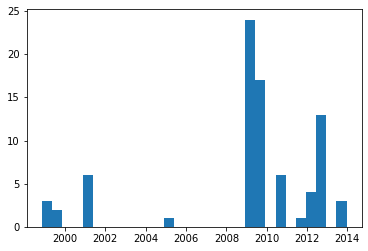

In [13]:
plt.hist(found_dates, bins=30)

In [14]:
found_lines, found_dates = search_in_articles(["elian", "karel"])

articles/0.txt
12/09/08
The posters with coloured images of Elian Karel and Juliana Vann were recalls of the heavy toll already paid by chiefs and the innocent ones .
articles/14.txt
09/06/21
ABILA , Kronos - A rally of hundreds of protestors allied with the " Protectors of Kronos " movement turned to violence today as angry activists vented their displeasure on the innocent citizens of Abila after hearing the news of POK leader Elian Karel 's death .
articles/18.txt
12/06/20
ABILA , Kronos - In a touching ceremony Wednesday leaders of the activist group Protectors of Kronos paid tribute to their fallen leader , Elian Karel , who was murdered on 19 June 2009 while being illegally detained in a Kronos jail .
articles/18.txt
12/06/20
" Today we gather to remember Elian Karel , " Silvia Marek told the rapt assembly , many of whom held up white candles in Karel 's honor .
articles/18.txt
12/06/20
" Elian was born on an Elodis farm not 40 minutes from here , to Jeroen and Antaura Karel .
ar

In [15]:
found_lines, found_dates = search_in_articles(["kidnap"],["pok", "protect"], thr=0)

articles/7.txt
14/01/20
What we know for certain is that 14 GAStech employees are not only missing , but kidnapped as confirmed by a Kronos Government source .
articles/29.txt
POK Kidnaps GAStech Employees
articles/29.txt
14/01/20
ABILA , Kronos - The Protectors of Kronos ( POK ) are suspected of kidnapping up to fourteen GAStech employees from their headquarters building earlier today .
articles/29.txt
14/01/20
Vann denied involvement with the POK and claimed to have no knowledge of the kidnapping .
articles/43.txt
14/01/20
MODERNIZATION 1732 - great part of the information has re - united from employs you of GAStech that have been allowed to go from the point of the investigators of the police to a kidnapping of several employ you of GAStech .
articles/43.txt
14/01/20
However , the civil employees have still not confirmed a kidnapping have happened .
articles/43.txt
14/01/20
There is a sure indication that the protections of Kronos - a recent group of the activist in charge of many d

In [16]:
def count_words(lines, w=1):
    count = dict()
    for i in range(len(lines)-w+1):
        word = lines[i:i+w]
        word = " ".join(word)
        if word not in count: count[word] = 0
        count[word] += 1
    count = {key:val for key, val in count.items() if val > 10}
    count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}
    
    return count

In [17]:
upper_words = dict()
articles = [f"articles/{i}.txt" for i in range(845)]
for line in read_file([report_5, report_10]+articles, lower=False):
    for word in line:
        if len(word)>2 and word.isupper(): 
            if word not in upper_words: upper_words[word] = 0
            upper_words[word] += 1
upper_words = {key:val for key, val in upper_words.items() if val > 10}
upper_words = {k: v for k, v in sorted(upper_words.items(), key=lambda item: item[1], reverse=True)}
print(upper_words)
upper_keywords = ["MDMC", "APA"]

{'POK': 800, 'ABILA': 434, 'THE': 255, 'ELODIS': 148, 'CEO': 98, 'GASTECH': 95, 'KRONOS': 80, 'WFA': 76, 'VOICES': 75, 'SCENE': 60, 'BLOG': 60, 'DOB': 59, 'GOVERNMENT': 48, 'LEADER': 47, 'PUBLIC': 37, 'PROTESTS': 36, 'HEALTH': 36, 'PRESIDENT': 35, 'FOR': 35, 'UPDATE': 34, 'CENTRUM': 32, 'IPO': 30, 'MODERNIZATION': 29, 'MDMC': 29, 'KAREL': 26, 'AND': 25, 'ALL': 24, 'SUBSTANCE': 23, 'COO': 23, 'DEGREE': 22, 'HASR': 21, 'CENTER': 19, 'POSSESSION': 19, 'ELIAN': 18, 'OUR': 18, 'CFO': 16, 'WHO': 16, 'SANJORGE': 15, 'THAT': 15, 'ARRESTED': 15, 'NEAR': 15, 'APA': 15, 'FACT': 14, 'SHEET': 14, 'ARRESTS': 14, 'THEFT': 14, 'WITH': 14, 'FOREIGN': 14, 'CIO': 13, 'CONTROLLED': 13, 'OTHER-3RD': 13, 'ARE': 13, 'TIME': 12, 'KIDNAPPING': 12, 'TISKELE': 12, 'EXPLOSION': 12, 'MINISTER': 12, 'KAPELOU': 12, 'DRUG': 11, 'DIES': 11, 'TAX': 11}


In [18]:
found_lines, _ = search_in_articles( ["MDMC"])

articles/205.txt
11/11/23
BODROGI , CARMÍN/12/1/1993 / Tiempo of the halting : 0230 hours / accused of : POSSESSION OF THE CONTROLLED SUBSTANCE ( MDMC ) ; ATTEMPT TO GIVE THE CONTROLLED SUBSTANCE ( MDMC )
articles/234.txt
14/03/26
Interpol has announced the formation of a detachment of forces of the new multi - country to fight the more and more ample distribution of cathinone of methyldimethyl of the drug ( MDMC ) .
articles/234.txt
14/03/26
This particular mixture of drug MDMC , also known by its street names the " caramel of cotton " , the " spice soña " and the " flower of tulipán " , was found previously only in Asteria but it has made his way to the streets of Tethys and other international countries .
articles/234.txt
14/03/26
Inspector greater Loblaw says the public statistic of Tethys indicates that MDMC is a problem every greater time with the youth of the country .
articles/234.txt
14/03/26
" In the first place we have alerted to harbor civil employees to be in the observati

In [19]:
found_lines, _ = search_in_articles(["APA"])

articles/141.txt
09/02/21
The gathering apart from international registered offices of GAStech had like consequence of the multiple arrests for the infringement .
articles/158.txt
10/06/21
He was attended only by apathetic guards which had been charged with holding him awaiting a research for tax fraud .
articles/167.txt
14/01/21
" However , increased activity by POK , APA [ Asterian People 's Army ] , and others in the region have significantly increased the risk . "
articles/234.txt
14/03/26
The army of people of Asterian ( APA ) is an organization paramilitary that has been contracted the financed activities of the terrorist with its criminal companies , that include drug traffic .
articles/234.txt
14/03/26
These last years the APA has tried to construct to their trade name with Web site and the publication of a professional compartment , of high called quality " Arise " .
articles/245.txt
14/01/21
Nochtans , see through the raised activity POK , APA [ the army of people Asterian ] 

In [20]:
found_lines, _ = search_in_articles(["asterian"])

articles/81.txt
13/02/09
The popular army of Asterian was traditionally implied traffic of drug in all the area , and them agencies of application examine thoroughly the possible co - operation between the organizations of traffic of drug and the insurgent groups political .
articles/93.txt
13/02/09
The army of people of Asterian been has implied traditionally with drug traffic through the region , and the agencies of the application are fence examinee the possible cooperation between the insurgent organizations of drug traffic and political groups .
articles/124.txt
13/02/08
The Asterian People 's Army has traditionally been involved with drug trafficking throughout the region , and enforcement agencies are closely examining possible cooperation between drug trafficking organizations and political insurgent groups .
articles/167.txt
14/01/21
" However , increased activity by POK , APA [ Asterian People 's Army ] , and others in the region have significantly increased the risk . "
arti

In [21]:
found_lines = search_in_articles(["DRUG"], ["pok", "protect"], 1)


articles/266.txt
12/02/05
ABILA , Kronos – Four Protectors of Kronos members were arrested by Abila police last week on false drug charges .
articles/389.txt
11/05/15
The concerns over the increase of drug related arrests are two - fold : first , violent activist groups such as the Protectors of Kronos could be using drug sales as a means to fund their activities ;
articles/576.txt
11/05/14
The concerns over the increase of drug related arrests are two - fold : first , violent activist groups such as the Protectors of Kronos could be using drug sales as a means to fund their activities ; and second , with more drugs appearing on the shore , the people of Kronos will suffer increased drug related issues , namely addiction and violence .
articles/661.txt
11/05/16
The preoccupations by the increase of related haltings drug are double : first , the violent groups of the activist such as the protectors of Kronos could use sales of the drug like means to finance their activities ; and second

{'Orhan.Strum@gastech.com.kronos': Text(1.0, 1.9868214793548218e-08, 'Orhan.Strum@gastech.com.kronos'),
 'Sten.Sanjorge Jr.@gastech.com.tethys': Text(0.7660444394347109, 0.6427875913329416, 'Sten.Sanjorge Jr.@gastech.com.tethys'),
 'Ada.Campo-Corrente@gastech.com.kronos': Text(0.17364822875361818, 0.9848077430671602, 'Ada.Campo-Corrente@gastech.com.kronos'),
 'Ruscella.Mies.Haber@gastech.com.kronos': Text(-0.5000000496705369, 0.8660254023735695, 'Ruscella.Mies.Haber@gastech.com.kronos'),
 'Inga.Ferro@gastech.com.kronos': Text(-0.9396926036166309, 0.34202023120707775, 'Inga.Ferro@gastech.com.kronos'),
 'Loreto.Bodrogi@gastech.com.kronos': Text(-0.9396926036166309, -0.34202013186600383, 'Loreto.Bodrogi@gastech.com.kronos'),
 'Isia.Vann@gastech.com.kronos': Text(-0.49999990065892597, -0.8660254222417842, 'Isia.Vann@gastech.com.kronos'),
 'Hennie.Osvaldo@gastech.com.kronos': Text(0.1736481691489738, -0.9848077033307305, 'Hennie.Osvaldo@gastech.com.kronos'),
 'Minke.Mies@gastech.com.kronos'

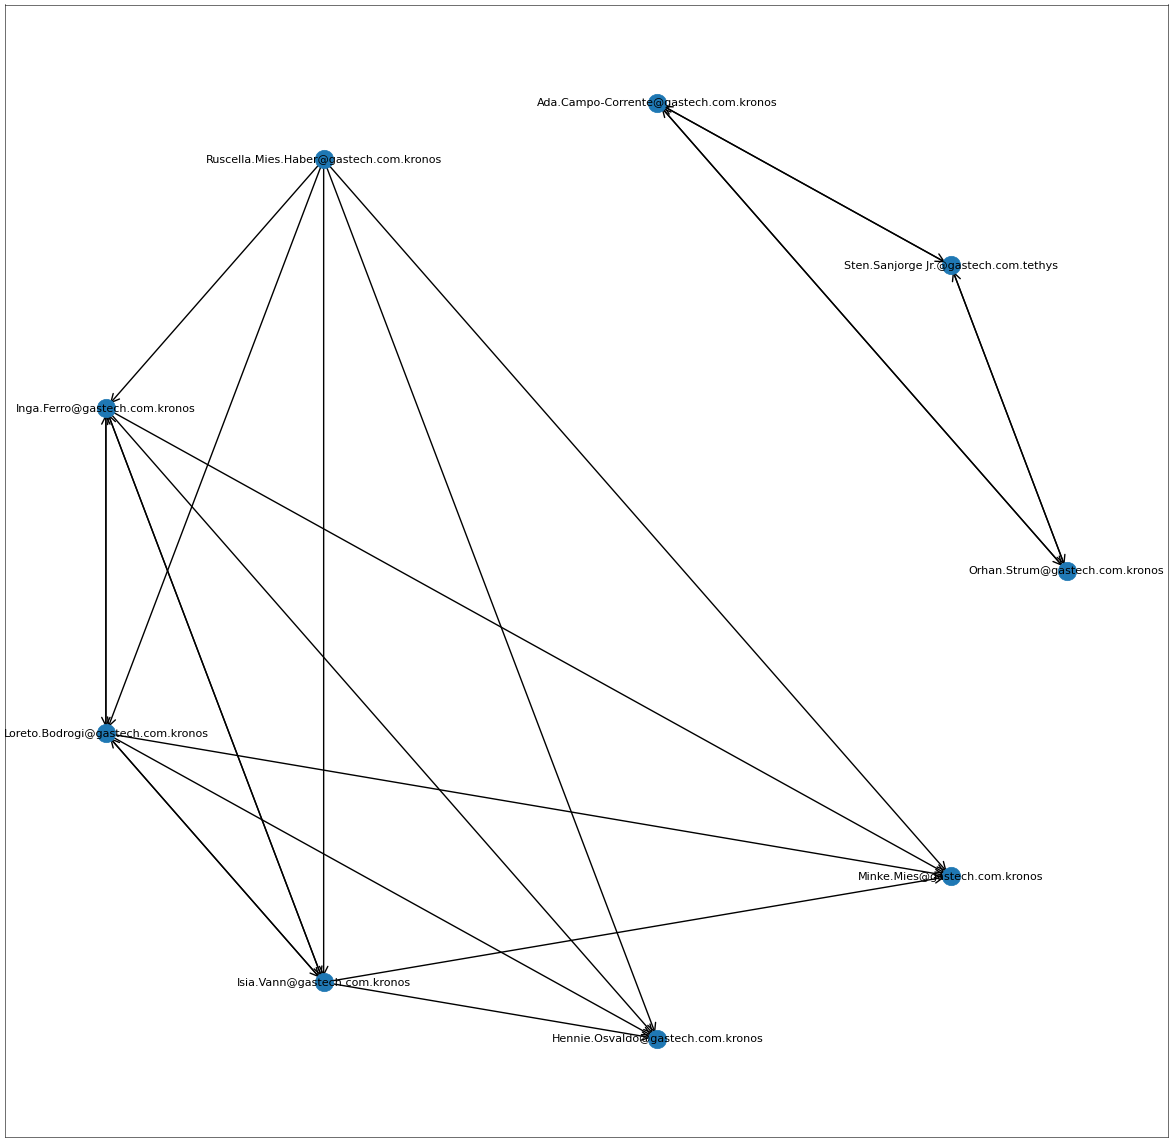

In [22]:


G = nx.DiGraph()
edges = dict()
keywords = ["protect", "kronos", "pok"]
df = pd.read_csv("email headers.csv")
for i in range(len(df)):
    if any([keyword in df["Subject"][i].lower() for keyword in keywords]):
        to = df["To"][i].split(", ")
        fr = df["From"][i]
        for t in to:
            e = (fr, t) 
            if e not in edges: edges[e] = 0
            edges[e] += 1
           
                
for e in edges:
    G.add_node(e[0])
    G.add_node(e[1])
    G.add_edge(*e, weight=edges[e])
         
edges = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
pos = nx.circular_layout(G)
plt.figure(figsize=[30, 30], dpi=50)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, arrowstyle="->", arrowsize=30)
nx.draw_networkx_labels(G, pos, font_size=16)


In [23]:
edges = dict()
keywords = ["protect", "kronos", "pok"]

df = pd.read_csv("email headers.csv")
df["To"].head()
for i in range(len(df)):
    if any([keyword in df["Subject"][i].lower() for keyword in keywords]):
        to = df["To"][i].split(", ")
        fr = df["From"][i]
        print(df["Subject"][i])

Impact of Kronos politics on upcoming rollout
RE: Impact of Kronos politics on upcoming rollout
RE: Impact of Kronos politics on upcoming rollout
RE: Impact of Kronos politics on upcoming rollout
RE: Impact of Kronos politics on upcoming rollout
RE: Impact of Kronos politics on upcoming rollout
RE: Impact of Kronos politics on upcoming rollout
RE: Impact of Kronos politics on upcoming rollout
FW: ARISE - Inspiration for Defenders of Kronos
RE: FW: ARISE - Inspiration for Defenders of Kronos
RE: FW: ARISE - Inspiration for Defenders of Kronos
RE: FW: ARISE - Inspiration for Defenders of Kronos
RE: FW: ARISE - Inspiration for Defenders of Kronos


In [24]:
found_lines = search_in_articles(["ARISE"])

articles/234.txt
14/03/26
These last years the APA has tried to construct to their trade name with Web site and the publication of a professional compartment , of high called quality " Arise " .
articles/287.txt
13/10/21
In recent years the APA has sought to build their brand through websites and the publication of a professional , high - quality magazine called " Arise " .
articles/513.txt
13/10/22
The last years their mark has had APA by Internet sites and publication of professional , hoogstaand illustrated magazine to build called Arise .
articles/687.txt
14/03/26
These last years the APA sought to establish their mark by Web sites and the publication of a professional store and high quality called " Arise " .
articles/775.txt
13/10/22
In recent years the APA has sought to build their brand through websites and the publication of a professional , high - quality magazine called " Arise " .
